# Veteran Suicides in the United States
Unfortunately, an average of 22 veterans take their own lives per day in the United States. Despite their brave efforts to protect our country, many of these soldiers suffer from a variety of mental illnesses and have a difficult time integrating back in to society. The following project analyzes veteran suicide statistics from the year 2011, a more recent data set. The main goal is to analyze any correlations between veteran suicides and their gender, geographical location, and how they compare to civilian suicide rates. Suicide is preventable, and a closer look in to this information could be crucial to the overall well-being of our veteran society. 

### Imports

In [142]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Dataset
This file provides information on veteran suicide statistics according to each U.S. state. Veteran gender, population and information on the overall civilian population are included.

[More information on this topic can be found here](https://backhome.news21.com/interactive/suicide-interactive/)

In [161]:
vet_suicides = pd.read_csv('2011.csv')
column_name_updates = {
    'state': 'State', 
    'vet_pop': 'Vet Population',
    'overall_pop_18': 'Overall Population',
    'vet_suicides': 'Vet Suicides',
    'all_suicides': 'All Suicides',
    'vet_males': 'Vet Males',
    'vet_females': 'Vet Females',
    'vet_rate': 'Vet Rate',
    'civ_rate': 'Civilian Rate'
}

vet_suicides = vet_suicides.rename(columns=column_name_updates)
vet_suicides = vet_suicides[column_name_updates.values()]
vet_suicides.head()

,State,Vet Population,Overall Population,Vet Suicides,All Suicides,Vet Males,Vet Females,Vet Rate,Civilian Rate
0,Alabama,395753,3662910,163,680,NaN,NaN,41.187306,15.824155
1,Alaska,72407,517799,27,142,24.0,3.0,37.289212,25.819952
2,Arizona,533608,4842927,242,1091,NaN,NaN,45.351644,19.701489
3,Arkansas,238790,2221409,89,447,89.0,0.0,37.271243,18.056924
4,California,1910994,28292703,706,3923,679.0,27.0,36.944124,12.194055


In [162]:
vet_suicides.describe()

,Vet Population,Overall Population,Vet Suicides,All Suicides,Vet Males,Vet Females,Vet Rate,Civilian Rate
count,5.000000e+01,5.000000e+01,50.000000,50.00000,31.000000,32.000000,50.000000,50.000000
mean,4.285742e+05,4.723110e+06,146.920000,764.86000,151.064516,4.937500,35.688293,16.699940
std,4.056443e+05,5.228324e+06,144.131437,745.08408,141.571404,6.137865,9.913856,4.271253
min,5.137300e+04,4.305540e+05,17.000000,104.00000,15.000000,0.000000,15.260897,9.104090
25%,1.462795e+05,1.400043e+06,56.000000,280.25000,67.000000,1.750000,28.121847,13.980547
50%,3.194590e+05,3.386286e+06,109.000000,611.00000,109.000000,3.000000,35.717400,15.879307
75%,5.227465e+05,5.190174e+06,190.750000,951.50000,193.000000,6.250000,41.103769,19.205721
max,1.910994e+06,2.829270e+07,706.000000,3923.00000,679.000000,27.000000,57.972848,26.974208


##### We want to analyze an aggregate veteran suicide count according to each state in the list. By arranging this information in descending order, we can easily display a visual analysis of the states with the highest veteran suicide counts for the year 2011.

In [163]:
total_suicides = vet_suicides.groupby('State')['Vet Suicides'].sum().sort_values(ascending=False)

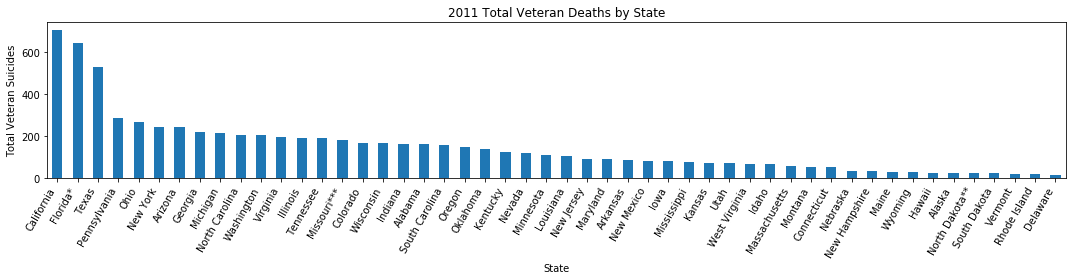

In [164]:
ax = total_suicides.plot.bar()
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15


ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha="right")
ax.set_title('2011 Total Veteran Deaths by State')

plt.ylabel('Total Veteran Suicides')
plt.tight_layout()

##### Now let's see if we can find any correlations between various variables from the data set

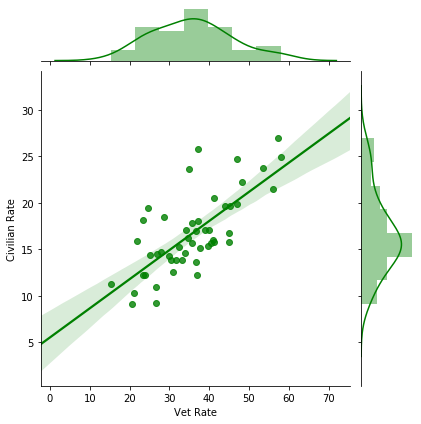

In [216]:
sns.jointplot(x='Vet Rate', y='Civilian Rate', data=vet_suicides, kind='reg', color='green')

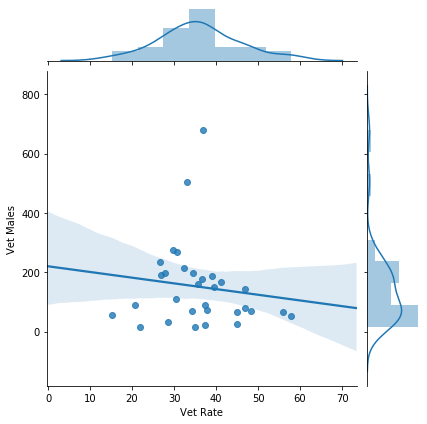

In [218]:
sns.jointplot(x='Vet Rate', y='Vet Males', data=vet_suicides, kind='reg')

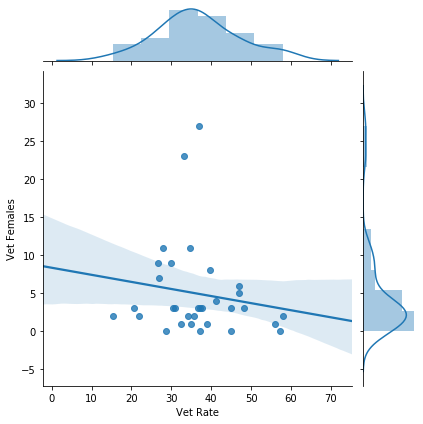

In [167]:
sns.jointplot(x='Vet Rate', y='Vet Females', data=vet_suicides, kind='reg')

Displaying the average suicide rates of civlians and veterans side by side shows that the average veteran suicide rate was over twice that of the civilian rate in 2011.

In [169]:
mean_rates = pd.DataFrame({
    'vet_rate_mean': vet_suicides['Vet Rate'].mean(),
    'civ_rate_mean': vet_suicides['Civilian Rate'].mean(),
    
}, index=[0], )
mean_rates

,vet_rate_mean,civ_rate_mean
0,35.688293,16.69994


Taking the average count of veteran males and females from the data set and comparing them to the mean veteran suicide rate, we see that the veteran male suicide rate was over 30 times that of females for the year 2011. 

In [214]:
vet_gender_rates = pd.DataFrame({
    'Vet Male Average': vet_suicides['Vet Males'].mean(),
    'Vet Female Average': vet_suicides['Vet Females'].mean(),
    'Average Vet Suicide Rate': vet_suicides['Vet Rate'].mean(),
    'Vet Male Suicide Rate': vet_suicides['Vet Males'].mean()/vet_suicides['Vet Suicides'].mean(),
    'Vet Female Suicide Rate': vet_suicides['Vet Females'].mean()/vet_suicides['Vet Suicides'].mean()
},index=[0])

In [215]:
vet_gender_rates

,Vet Male Average,Vet Female Average,Average Vet Suicide Rate,Vet Male Suicide Rate,Vet Female Suicide Rate
0,151.064516,4.9375,35.688293,1.028209,0.033607
